In [1]:
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
images = glob.glob('/users/kainie/documents/smart_assembling/20211123_image_data/calibration_board_1123/*.bmp')
images.sort()
images = images[:-3]
print(images)

['/Users/kainie/Documents/smart_assembling/20211123_image_data/calibration_board_1123/00.bmp', '/Users/kainie/Documents/smart_assembling/20211123_image_data/calibration_board_1123/01.bmp', '/Users/kainie/Documents/smart_assembling/20211123_image_data/calibration_board_1123/02.bmp', '/Users/kainie/Documents/smart_assembling/20211123_image_data/calibration_board_1123/03.bmp', '/Users/kainie/Documents/smart_assembling/20211123_image_data/calibration_board_1123/04.bmp', '/Users/kainie/Documents/smart_assembling/20211123_image_data/calibration_board_1123/05.bmp', '/Users/kainie/Documents/smart_assembling/20211123_image_data/calibration_board_1123/06.bmp', '/Users/kainie/Documents/smart_assembling/20211123_image_data/calibration_board_1123/07.bmp', '/Users/kainie/Documents/smart_assembling/20211123_image_data/calibration_board_1123/08.bmp', '/Users/kainie/Documents/smart_assembling/20211123_image_data/calibration_board_1123/09.bmp', '/Users/kainie/Documents/smart_assembling/20211123_image_da

In [3]:
img = cv2.imread(images[0], 0)

In [4]:
out = cv2.resize(img, (int(img.shape[1] / 4), int(img.shape[0] / 4)))

In [5]:
fast = cv2.FastFeatureDetector()

In [ ]:
kp = fast.detect(out, None)
img2 = cv2.drawKeypoints(out, kp, color=(255,0,0))

In [ ]:
plt.imshow(img2)
plt.show()

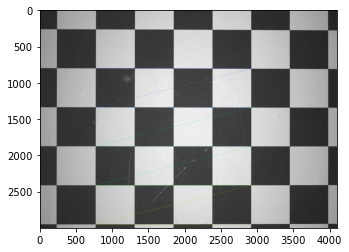

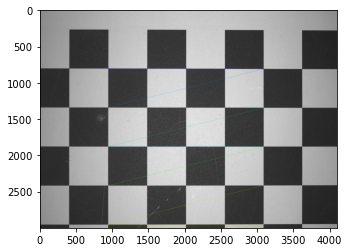

In [29]:
scale = 4
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# objp = np.zeros((11*7,3), np.float32)
# objp[:,:2] = np.mgrid[0:7,0:11].T.reshape(-1,2)
# # Arrays to store object points and image points from all the images.
# objpoints = [] # 3d point in real world space
# imgpoints = [] # 2d points in image plane.
## images = glob.glob('*.jpg')
for fname in images:
    gray = cv2.imread(fname, 0)
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    vis = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    # Find the chess board corners
    gray_resize = cv2.resize(gray, (int(gray.shape[1] / scale), int(gray.shape[0] / scale)))
    ret, corners = cv2.findChessboardCorners(gray_resize, (5,5), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        # objpoints.append(objp)
        corners = corners * scale 
        corners2 = cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        # imgpoints.append(corners)
        # Draw and display the corners
        cv2.drawChessboardCorners(vis, (5,5), corners2, ret) 
        plt.imshow(vis)
        plt.show()

In [13]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [41]:
pattern_set = glob.glob('../data/TI/cd_11_15_2/*.jpg')
pattern_set.sort()

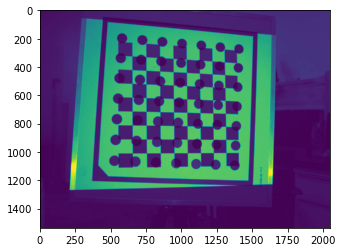

In [46]:
img = cv2.imread(pattern_set[2],0)
plt.imshow(img)
plt.show()

In [48]:
ret, corners = cv2.findCirclesGrid(img, (7, 7), cv2.CALIB_CB_SYMMETRIC_GRID)
if ret:
    vis = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    cv2.drawChessboardCorners(vis, (7,7), corners, ret)
    plt.imshow(vis)
    plt.show()
else:
    print("corner find failed!!!")

corner find failed!!!


In [50]:
scale_img = cv2.resize(img, (img.shape[1]//4, img.shape[0]//4))
scale_img = 255 - scale_img
ret, corners = cv2.findChessboardCorners(scale_img, (8, 8))
if ret:
    plt.imshow(scale_img)
    plt.show()
else:
    print("corner find failed")

corner find failed


In [52]:
def RemovePrinted_AddProjectBoard(projector_all_on, projector_all_off, board_image_print_and_project):
    albedo = np.empty_like(projector_all_on)
    out = np.empty_like(projector_all_on)
    all_on = projector_all_on.copy()
    all_off = projector_all_off.copy()
    combo = board_image_print_and_project.copy()

    rows, cols = projector_all_on.shape
    for yRow in range(rows):
        for xCol in range(cols):
            val_all_off = all_off[yRow, xCol]
            val_all_on = all_on[yRow, xCol]
            val_albedo = (val_all_on + val_all_off) / 2
            albedo[yRow, xCol] = val_albedo
    for yRow in range(rows):
        for xCol in range(cols):
            val_coded = combo[yRow, xCol]
            val_albedo = albedo[yRow, xCol]
            if val_coded > val_albedo or np.abs(val_coded-val_albedo) < 5:
                out[yRow, xCol] = 255
            else:
                out[yRow, xCol] = 0
    return out

In [53]:
projector_all_on = cv2.imread(pattern_set[0], 0)
projector_all_off = cv2.imread(pattern_set[1], 0)
board_image_print_and_project = cv2.imread(pattern_set[2], 0)


In [54]:
out = RemovePrinted_AddProjectBoard(projector_all_on, projector_all_off, board_image_print_and_project)

/Users/kainie/opt/anaconda3/envs/point_3d/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
/Users/kainie/opt/anaconda3/envs/point_3d/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/kainie/opt/anaconda3/envs/point_3d/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "/Users/kainie/opt/anaconda3/envs/point_3d/lib/python3.7/tkinter/__init__.py", line 749, in callit
    func(*args)
  File "/Users/kainie/opt/anaconda3/envs/point_3d/lib/python3.7/site-packages/matplotlib/backends/_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "/Users/kainie/opt/anaconda3/envs/point_3d/lib/python3.7/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/Users/kainie/opt/anaconda3/envs/point_3d/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "/Users/kainie/opt/anaconda3/envs/point_3d/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1535, in _draw
    def _draw(renderer): raise Done(renderer)
matp

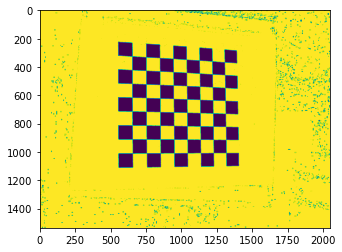

In [59]:
plt.imshow(out)

In [58]:
plt.show()